In [103]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D, GRU # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
from keras import metrics
from keras.utils import plot_model
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

import seaborn as sns
#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [104]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df=df.dropna(axis=0, how='all')#drop full nan rows
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.9146 35.4470          0.0    -13.5180    0.747460      5.0862   
          35.4490          0.0    -13.6410    0.063185      4.4150   
          35.4510          0.0    -13.6300    0.400600      4.7172   
          35.4530          0.0    -13.5690   -0.500240      4.0645   
          35.4550          0.0    -13.5060   -1.107300      2.9022   
...                        ...         ...         ...         ...   
-117.6414 37.6236          0.0      4.8278   -1.306500         NaN   
          37.6256          0.0      4.8698   -1.213700         NaN   
          37.6276          0.0      4.8693   -1.189300         NaN   
          37.6296          0.0      4.8277   -1.190600         NaN   
          37.6316          0.0      4.8729   -1.120000         NaN   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.9146 35.4470      -1.9668     1.29470     -5.1067     0.87440   
          35.4490      -2.5803     0.74781     -5.7172     0.19724   
          35.4510      -2.3308     0.99271     -5.4875     0.39402   
          35.4530      -2.8942     0.21585     -6.1191     0.00391   
          35.4550      -4.1777    -1.13510     -7.3587    -1.35330   
...                        ...         ...         ...         ...   
-117.6414 37.6236      -4.1515    -1.99990      9.9914    -3.10550   
          37.6256      -4.1588    -1.73720     10.4130    -2.95840   
          37.6276      -4.1632    -1.71070     10.4830    -2.93180   
          37.6296      -4.1240    -1.89490     10.1870    -3.01790   
          37.6316      -4.1457    -1.70330     10.5180    -2.92690   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.9146 35.4470     -5.15400     2.55900  ...     -6.5221     -3.3514   
          35.4490     -5.74300     1.93390  ...     -7.3692     -4.3340   
          35.4510     -5.48650     2.15280  ...     -6.8486     -4.0115   
          35.4530     -5.82860     1.83380  ...     -5.6745     -3.0299   
          35.4550     -7.29700     0.46061  ...     -7.9927     -5.4295   
...                        ...         ...  ...         ...         ...   
-117.6414 37.6236     -0.32799     6.98990  ...      8.5800     11.3410   
          37.6256     -0.33838     7.34020  ...      9.2515     11.9960   
          37.6276     -0.34454     7.39780  ...      8.8321     11.5700   
          37.6296     -0.31614     7.12450  ...     10.3320     13.0730   
          37.6316     -0.33153     7.38390  ...      9.3376     12.0530   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.9146 35.4470      -4.1662     -6.3219     -11.361     -9.6235   
          35.4490      -5.1182     -7.1733     -12.311    -10.5640   
          35.4510      -4.7786     -6.7119     -11.929    -10.1480   
          35.4530      -3.7675     -5.5943     -10.838     -9.0944   
          35.4550      -6.2580     -7.9820     -13.136    -11.3610   
...                        ...         ...         ...         ...   
-117.6414 37.6236       5.5704      7.6113      17.002      9.6014   
          37.6256       6.0621      8.2387      17.526      9.5942   
          37.6276       5.5897      7.8226      17.066      9.2927   
          37.6296       7.2137      9.3699      18.582     10.8610   
          37.6316       6.0863      8.3323      17.499      9.8190   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.9146 35.4470      -4.9249     -3.5976     -5.1346     -4.4193  
          35.4490      -5.7429     -4.3201     -5.8205     -5.0144  
          35.4510      -5.1576     

In [105]:
df2=pd.read_csv('InSAR_data_south/displacement/groundwater.csv')
df2=df2.set_index([df2.columns[0],df2.columns[1]])
df2.columns=pd.to_datetime(df2.columns, format='%Y-%m-%d')

In [106]:
dftest2=df.iloc[df.index.get_level_values('Longitude')< -119.6 ]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Longitude')> -120.1]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')> 35.7]
dftest2=dftest2.iloc[dftest2.index.get_level_values('Latitude')< 36.6]
dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.0988 35.7011          0.0    -7.89900    1.378300     2.79680   
          35.7031          0.0    -7.88820    1.502300     2.85130   
          35.7051          0.0    -7.85260    1.453000     2.88650   
          35.7071          0.0    -7.88320    1.554900     2.99360   
          35.7091          0.0    -7.91260    1.611200     3.05330   
...                        ...         ...         ...         ...   
-119.6009 36.5913          0.0    -0.23405    0.296610     0.54468   
          36.5933          0.0    -0.36838    0.082284     0.45319   
          36.5953          0.0    -0.51149    0.037991     0.32491   
          36.5973          0.0    -0.36309    0.001290     0.44965   
          36.5993          0.0    -0.17284   -0.005103     0.29432   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.0988 35.7011    -1.035300     2.95010   -0.165060     1.59460   
          35.7031    -0.993290     3.04630   -0.079971     1.67710   
          35.7051    -1.031800     3.01020   -0.104790     1.65490   
          35.7071    -0.990330     3.03060    0.018495     1.71960   
          35.7091    -0.971260     3.04230    0.090135     1.75960   
...                        ...         ...         ...         ...   
-119.6009 36.5913     0.233920     0.67507   -0.085963     0.45873   
          36.5933     0.120070     0.48330   -0.216910     0.46524   
          36.5953     0.059849     0.43244   -0.161240     0.43959   
          36.5973     0.053344     0.47563    0.071814     0.89503   
          36.5993     0.016161     0.43002   -0.086956     0.41117   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.0988 35.7011     0.070706     2.47120  ...     2.03920     3.61490   
          35.7031     0.069854     2.54690  ...     2.15690     3.75600   
          35.7051     0.022669     2.53140  ...     2.26630     3.91320   
          35.7071     0.085024     2.63200  ...     2.51680     4.20520   
          35.7091     0.113460     2.66900  ...     2.68050     4.38940   
...                        ...         ...  ...         ...         ...   
-119.6009 36.5913     0.099922     0.45812  ...     0.47031     0.35714   
          36.5933     0.107740     0.58097  ...     0.32769     0.22167   
          36.5953     0.075568     0.41622  ...     0.71335     0.58026   
          36.5973     0.625020     0.81388  ...     0.99616     0.83695   
          36.5993     0.078417     0.33423  ...    -0.19759    -0.35291   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.0988 35.7011      2.06620     3.12890     2.76490   -0.362710   
          35.7031      2.18030     3.23810     2.95380   -0.204530   
          35.7051      2.30160     3.35510     3.10160   -0.006158   
          35.7071      2.54810     3.60390     3.38190    0.324240   
          35.7091      2.70230     3.76640     3.61470    0.568970   
...                        ...         ...         ...         ...   
-119.6009 36.5913      0.51789     0.39998     0.68178    0.126800   
          36.5933      0.35083     0.24175     0.51479   -0.090722   
          36.5953      0.67036     0.60755     0.89838    0.261420   
          36.5973      0.92419     0.83067     1.10370    0.435580   
          36.5993     -0.31105    -0.36822    -0.17379   -0.817680   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.0988 35.7011      2.25160     4.09460     3.39600     4.22980  
          35.7031      2.51120     4.28660     3.59350     4.40380  
          35.7051      2.86110     

In [107]:
for row in range(len(dftest2.index)-1,-1,-1):
    if dftest2.index[row] not in df2.index:
            dftest2.drop(index=dftest2.index[row], inplace=True)
dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-120.0988 35.8171          0.0    -7.44130    1.611600    2.867000   
          35.9332          0.0    -6.84590    1.622100    2.636400   
          36.1012          0.0    -6.03120    1.666400    3.782300   
-120.0968 35.9852          0.0    -6.84490    1.344800    3.249300   
          36.1852          0.0    -6.36050    2.528400    5.543000   
...                        ...         ...         ...         ...   
-119.6029 36.4813          0.0    -2.68260    0.449070    1.079200   
-119.6009 35.7351          0.0    -5.68580    1.065800    1.300300   
          36.2492          0.0    -2.69520    1.129600    0.090393   
          36.4493          0.0    -2.60150    0.410580    0.833170   
          36.5653          0.0    -0.56296    0.013307    0.570070   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-120.0988 35.8171    -0.631830     4.02400    0.345960    2.383700   
          35.9332    -0.678160     4.33060    0.549880    2.158200   
          36.1012    -0.790180     4.04540    0.072619   -0.489990   
-120.0968 35.9852    -0.426710     4.48300    1.098100    1.900600   
          36.1852     1.149100     6.17830    1.743800    0.170710   
...                        ...         ...         ...         ...   
-119.6029 36.4813    -0.229720     0.49846   -0.589950   -0.188730   
-119.6009 35.7351    -1.080200     2.10690   -0.094301    0.023205   
          36.2492    -3.586700    -3.89010   -6.906900   -8.928600   
          36.4493    -0.622240     0.42892   -0.920640   -0.573110   
          36.5653    -0.028894     0.50740    0.121650    0.572380   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-120.0988 35.8171     0.665640     2.42380  ...     3.05160      4.8731   
          35.9332     0.984230     2.14210  ...     3.02990      4.8895   
          36.1012    -0.170510    -1.21320  ...    -7.15650     -4.7987   
-120.0968 35.9852     1.260600     1.82280  ...     3.26470      5.2447   
          36.1852    -0.805060    -2.55110  ...    -0.41253      2.0492   
...                        ...         ...  ...         ...         ...   
-119.6029 36.4813     0.270800    -0.12873  ...    -5.02420     -4.5236   
-119.6009 35.7351    -1.956400    -0.90256  ...   -11.17300    -11.1900   
          36.2492   -12.299000   -16.22500  ...   -67.81400    -66.7860   
          36.4493     0.005026    -0.42261  ...    -5.00310     -4.2826   
          36.5653     0.649680     0.49871  ...     2.81620      2.9257   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-120.0988 35.8171      3.18970     4.37360      2.6908    0.041718   
          35.9332      3.28250     4.51290      2.6161    0.220740   
          36.1012     -6.59000    -5.61850     -8.0356   -8.517900   
-120.0968 35.9852      3.65870     4.75730      2.1463    1.406500   
          36.1852      0.16939     0.56145     -1.9144   -2.047700   
...                        ...         ...         ...         ...   
-119.6029 36.4813     -4.64940    -4.77490     -5.2298   -4.689300   
-119.6009 35.7351    -11.05500   -10.23000    -10.8780  -11.704000   
          36.2492    -67.07200   -66.56000    -67.7720  -67.185000   
          36.4493     -4.75460    -4.66010     -5.2180   -4.633900   
          36.5653      2.84600     2.60240      2.8074    2.351700   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-120.0988 35.8171      3.05820     4.92730     3.90570      5.3531  
          35.9332      3.13380     4.73690     3.71430      4.8284  
          36.1012     -6.16500    -

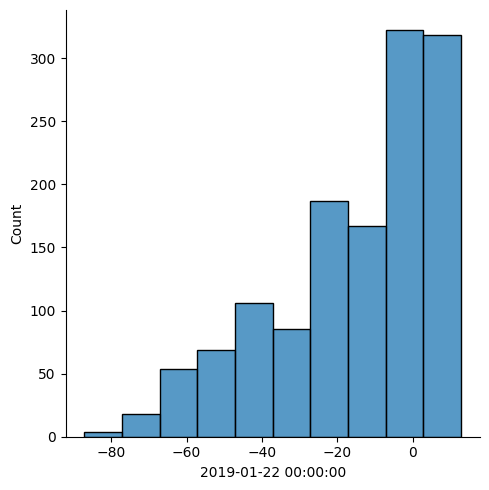

In [108]:
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [127]:
buckets = [0] * 120
import math
#math.modf(dftest2.iloc[: , -1].values[0])
#dftest2.iloc[: , -1].values[0]
for x in range(len(dtemp.iloc[: , -1].values)-1,-1,-1):
    r,l=math.modf(dtemp.iloc[: , -1].values[x])
    if l >=0:
        l=l+100
    else:
        l=-1*l
    if buckets[int(l)]>1 and (l<63 or l>=100):
        dtemp.drop(index=dtemp.index[x], inplace=True)
    else:
        buckets[int(l)]+=1

In [121]:
dtemp2=dftest2

In [128]:
dtemp

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.9109 35.7051          0.0    -7.28270    1.762300    3.404200   
          36.2712          0.0    -4.77020    1.830600    4.247100   
          36.4713          0.0    -4.96970    0.219390    1.212800   
-119.9029 36.1752          0.0    -5.51700    1.331400    2.807600   
-119.8989 36.2272          0.0    -4.84400    1.351700    3.420400   
...                        ...         ...         ...         ...   
-119.6029 36.4813          0.0    -2.68260    0.449070    1.079200   
-119.6009 35.7351          0.0    -5.68580    1.065800    1.300300   
          36.2492          0.0    -2.69520    1.129600    0.090393   
          36.4493          0.0    -2.60150    0.410580    0.833170   
          36.5653          0.0    -0.56296    0.013307    0.570070   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.9109 35.7051    -0.126040     4.74920    1.640200    2.496200   
          36.2712     0.381440     3.68140   -0.962360   -1.983100   
          36.4713    -1.688600     1.78180   -2.299900   -1.739200   
-119.9029 36.1752    -2.012400     2.04560   -2.386400   -3.475100   
-119.8989 36.2272    -1.247700     2.15830   -2.497100   -3.446500   
...                        ...         ...         ...         ...   
-119.6029 36.4813    -0.229720     0.49846   -0.589950   -0.188730   
-119.6009 35.7351    -1.080200     2.10690   -0.094301    0.023205   
          36.2492    -3.586700    -3.89010   -6.906900   -8.928600   
          36.4493    -0.622240     0.42892   -0.920640   -0.573110   
          36.5653    -0.028894     0.50740    0.121650    0.572380   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-119.9109 35.7051     0.987220     2.43380  ...      6.3983      7.6670   
          36.2712    -2.409600    -5.57870  ...    -18.8810    -16.5880   
          36.4713    -0.630970    -4.59800  ...    -21.7070    -19.2380   
-119.9029 36.1752    -4.638100    -6.20800  ...    -24.8370    -23.2210   
-119.8989 36.2272    -4.901400    -7.90820  ...    -26.3030    -24.3940   
...                        ...         ...  ...         ...         ...   
-119.6029 36.4813     0.270800    -0.12873  ...     -5.0242     -4.5236   
-119.6009 35.7351    -1.956400    -0.90256  ...    -11.1730    -11.1900   
          36.2492   -12.299000   -16.22500  ...    -67.8140    -66.7860   
          36.4493     0.005026    -0.42261  ...     -5.0031     -4.2826   
          36.5653     0.649680     0.49871  ...      2.8162      2.9257   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-119.9109 35.7051       6.3083      7.0895      6.8489      4.2806   
          36.2712     -18.6060    -17.8420    -20.7200    -19.5980   
          36.4713     -20.9850    -20.9250    -23.1000    -22.6140   
-119.9029 36.1752     -24.6330    -24.2790    -26.7980    -25.6970   
-119.8989 36.2272     -26.1640    -25.4970    -27.9550    -26.8460   
...                        ...         ...         ...         ...   
-119.6029 36.4813      -4.6494     -4.7749     -5.2298     -4.6893   
-119.6009 35.7351     -11.0550    -10.2300    -10.8780    -11.7040   
          36.2492     -67.0720    -66.5600    -67.7720    -67.1850   
          36.4493      -4.7546     -4.6601     -5.2180     -4.6339   
          36.5653       2.8460      2.6024      2.8074      2.3517   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-119.9109 35.7051       6.7730      8.2182      7.3445      8.6782  
          36.2712     -17.7740    -17.3060    -17.8360    -16.3050  
          36.4713     -21.8350    -

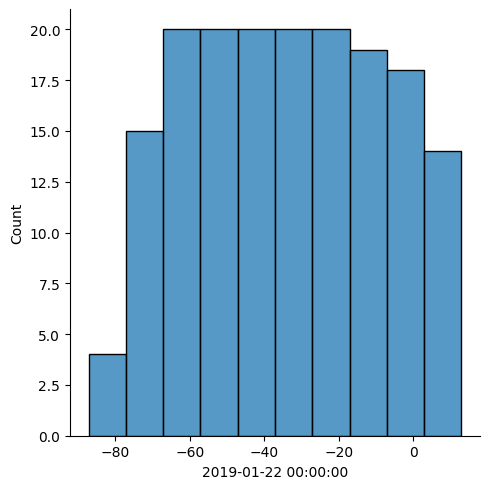

In [129]:
sns.displot( x=dftest2.iloc[: , -1], binwidth=10)

In [112]:
dftest2.iloc[: , -1].values

array([  8.6782 , -16.305  , -20.514  , -22.966  , -23.622  , -22.874  ,
       -21.282  , -18.825  ,   9.191  ,   8.1094 , -18.682  , -25.446  ,
       -19.626  , -27.767  , -27.872  , -34.694  ,   7.2625 , -60.017  ,
       -30.856  , -38.849  , -35.548  , -62.771  , -19.491  , -35.833  ,
       -64.591  , -26.258  , -37.715  , -54.609  , -32.446  , -20.076  ,
       -60.43   , -29.385  , -40.273  ,   6.4878 , -40.008  ,   7.2879 ,
       -24.17   , -43.362  , -61.785  , -31.367  , -43.327  , -24.551  ,
         6.0633 , -11.095  , -31.234  , -28.585  , -49.002  , -49.91   ,
       -28.832  , -51.015  , -36.479  , -54.68   , -47.297  , -38.77   ,
       -53.741  , -61.959  , -61.74   , -42.395  , -47.218  , -53.23   ,
       -51.325  , -11.944  , -39.254  , -64.734  , -59.351  , -26.012  ,
       -61.633  , -62.427  , -57.566  , -44.543  , -64.677  , -63.915  ,
       -67.866  , -34.674  , -65.821  , -42.92   , -67.333  , -14.125  ,
       -63.759  , -64.219  , -33.581  , -66.41   , 

In [113]:
# buckets = [0] * 100
# import math
# dftest=dftest2.copy()

# #math.modf(dftest2.iloc[: , -1].values[0])
# #dftest2.iloc[: , -1].values[0]
# for x in range(len(dftest2.iloc[: , -1].values)-1,-1,-1):
#     r,l=math.modf(dftest2.iloc[: , -1].values[x])   
#     if buckets[int(l)]>1:
#         dftest2.drop(index=dftest2.index[x], inplace=True)
#     else:
#         buckets[int(l)]+=1
#         dftest.drop(index=dftest.index[x], inplace=True)

In [130]:
dftest2

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.9109 35.7051          0.0    -7.28270    1.762300    3.404200   
          36.2712          0.0    -4.77020    1.830600    4.247100   
          36.4713          0.0    -4.96970    0.219390    1.212800   
-119.9029 36.1752          0.0    -5.51700    1.331400    2.807600   
-119.8989 36.2272          0.0    -4.84400    1.351700    3.420400   
...                        ...         ...         ...         ...   
-119.6029 36.4813          0.0    -2.68260    0.449070    1.079200   
-119.6009 35.7351          0.0    -5.68580    1.065800    1.300300   
          36.2492          0.0    -2.69520    1.129600    0.090393   
          36.4493          0.0    -2.60150    0.410580    0.833170   
          36.5653          0.0    -0.56296    0.013307    0.570070   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.9109 35.7051    -0.126040     4.74920    1.640200    2.496200   
          36.2712     0.381440     3.68140   -0.962360   -1.983100   
          36.4713    -1.688600     1.78180   -2.299900   -1.739200   
-119.9029 36.1752    -2.012400     2.04560   -2.386400   -3.475100   
-119.8989 36.2272    -1.247700     2.15830   -2.497100   -3.446500   
...                        ...         ...         ...         ...   
-119.6029 36.4813    -0.229720     0.49846   -0.589950   -0.188730   
-119.6009 35.7351    -1.080200     2.10690   -0.094301    0.023205   
          36.2492    -3.586700    -3.89010   -6.906900   -8.928600   
          36.4493    -0.622240     0.42892   -0.920640   -0.573110   
          36.5653    -0.028894     0.50740    0.121650    0.572380   

                    2015-06-12  2015-07-06  ...  2018-10-18  2018-10-30  \
Longitude Latitude                          ...                           
-119.9109 35.7051     0.987220     2.43380  ...      6.3983      7.6670   
          36.2712    -2.409600    -5.57870  ...    -18.8810    -16.5880   
          36.4713    -0.630970    -4.59800  ...    -21.7070    -19.2380   
-119.9029 36.1752    -4.638100    -6.20800  ...    -24.8370    -23.2210   
-119.8989 36.2272    -4.901400    -7.90820  ...    -26.3030    -24.3940   
...                        ...         ...  ...         ...         ...   
-119.6029 36.4813     0.270800    -0.12873  ...     -5.0242     -4.5236   
-119.6009 35.7351    -1.956400    -0.90256  ...    -11.1730    -11.1900   
          36.2492   -12.299000   -16.22500  ...    -67.8140    -66.7860   
          36.4493     0.005026    -0.42261  ...     -5.0031     -4.2826   
          36.5653     0.649680     0.49871  ...      2.8162      2.9257   

                    2018-11-11  2018-11-17  2018-11-23  2018-12-05  \
Longitude Latitude                                                   
-119.9109 35.7051       6.3083      7.0895      6.8489      4.2806   
          36.2712     -18.6060    -17.8420    -20.7200    -19.5980   
          36.4713     -20.9850    -20.9250    -23.1000    -22.6140   
-119.9029 36.1752     -24.6330    -24.2790    -26.7980    -25.6970   
-119.8989 36.2272     -26.1640    -25.4970    -27.9550    -26.8460   
...                        ...         ...         ...         ...   
-119.6029 36.4813      -4.6494     -4.7749     -5.2298     -4.6893   
-119.6009 35.7351     -11.0550    -10.2300    -10.8780    -11.7040   
          36.2492     -67.0720    -66.5600    -67.7720    -67.1850   
          36.4493      -4.7546     -4.6601     -5.2180     -4.6339   
          36.5653       2.8460      2.6024      2.8074      2.3517   

                    2018-12-17  2018-12-29  2019-01-10  2019-01-22  
Longitude Latitude                                                  
-119.9109 35.7051       6.7730      8.2182      7.3445      8.6782  
          36.2712     -17.7740    -17.3060    -17.8360    -16.3050  
          36.4713     -21.8350    -

In [131]:
dtemp.to_csv('E:/DSFellowship/InSAR_data_south/displacement/testset170.csv')